# Seminar 7

Classification $y_i \in \{1, ... , K\}$- $K$ classes

Example of multiclass ($K \ge 3$) classification task:


*   Classify images (what is on the picture?)


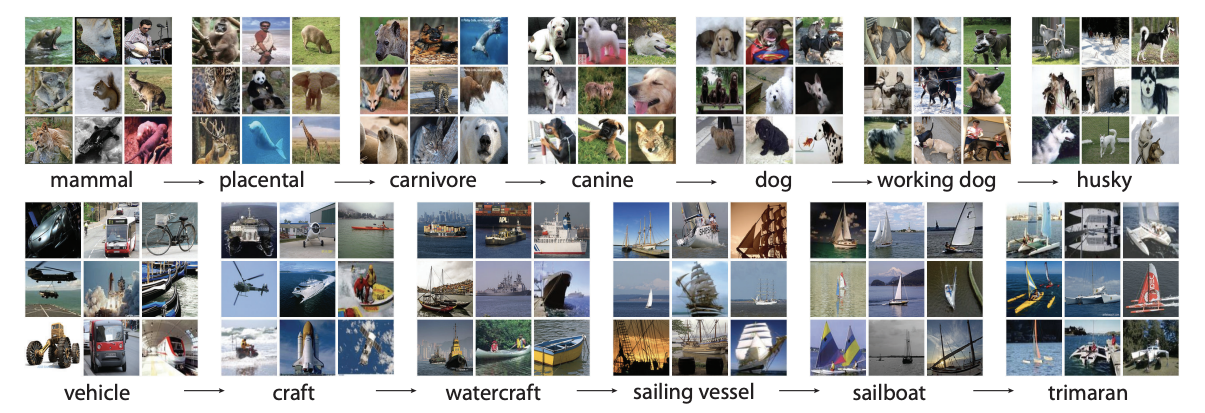

*   Classify texts by topic (travel, comedy, business, ...)
*   [Space objects](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) (galaxy, quasar, or star?)



Binary classification - 2 classes (often $y_i \in \{ -1, +1\}$ or $y_i \in \{ 0, +1\}$)

Examples:


*   Credit score: will the customer pay off the loan?
*   Sentiment analysis: is the text positive or negative?
*   Medicine: does the person have the covid/diabetes/cancer?



## Logistic regression

### Theory

 We'll solve the binary classification problem by predicting the probability that an object belongs to the positive (+1) class.

 Suppose we have a linear model of the form:

 $$a(x) = w_0 + w_1x_1 + w_2x_2 + ... + w_d x_d = w_0 + \sum_{i=1}^d w_ix_i$$



**Question:** can we use $a(x)$ as a probability of a positive class?

To get  probability we use sigmoid or logistic function.

$$\sigma(x)=\frac{1}{1+e^{−x}}$$

It looks like this:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png" width="500" height="300">

And knowing the probabilities ($p=\sigma(a(x))$), we will ultimately be able to say whether the object belongs to class 0 or +1.

For example, we can consider that if the probability of belonging to the positive class is greater than 0.5 ($p>0.5$), the object is classified as positive class (+1), otherwise, negative class (0).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Practise

Let's use [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

This dataset consists of 150 observations, each of which represents four measurements: `sepal length`, `sepal width`, `petal length`, and `petal width`. Each observation belongs to one of three iris classes: setosa, versicolor, or virginica.

The task is to predict the flower class based on the measurements.

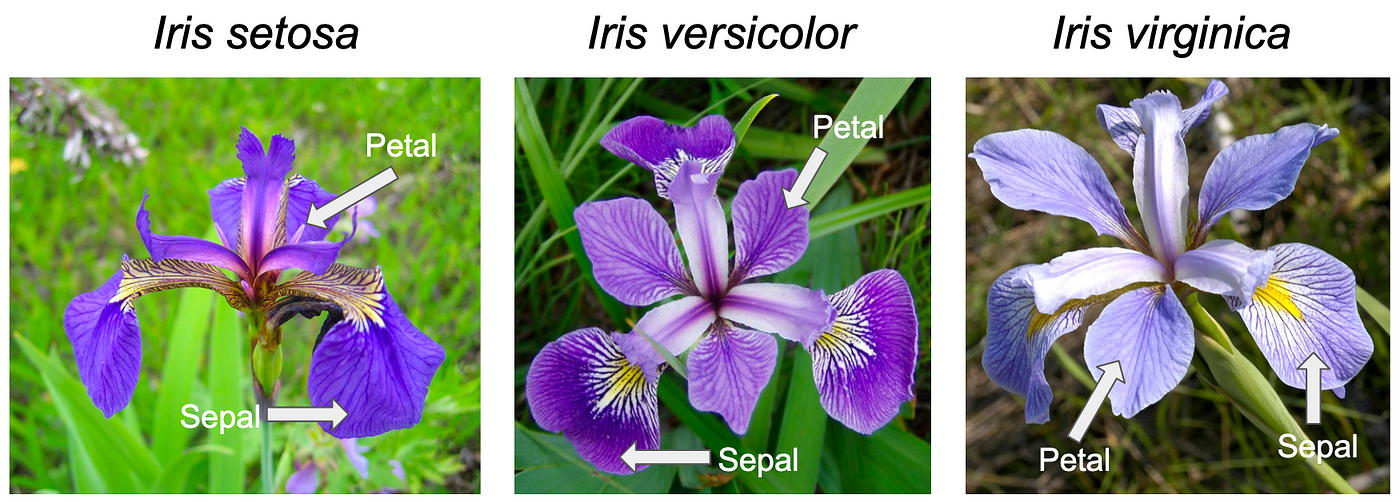

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target'].copy()
X.head()

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
data['target_names']

Let's make the classification binary: we will predict if the flower is versicolor or not.

So versicolor (class 1) will be +1 and setosa, virginica (classes 0, 2) will be 0.

In [ ]:
y ... #your code here

In [ ]:
assert np.allclose(np.unique(y, return_counts=True), (np.array([0, 1]), np.array([100,  50])))

np.unique(y, return_counts=True)

Also, let's work only with 2 features: `sepal length (cm)` and `sepal width (cm)`

In [ ]:
X = X[['sepal length (cm)', 'sepal width (cm)']]

Let's split the data into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
np.unique(y_test, return_counts=True)

In [ ]:
plt.title('Train points colored by target')

#color is the target: purple (0) and yellow (1)
plt.scatter(X_train['sepal length (cm)'],
            X_train['sepal width (cm)'],
            c = y_train)

Note: selecting train/test randomly is important. Why? - order of the samples will not break our pipeline:

What if we just decided to take the last 30\% of samples as test?

In [ ]:
##THIS IS BAD CODE, DO NOT USE IT FOR TRAIN-TEST SELECTION##
X_train_bad = X[:-int(len(X) * 0.3)]
X_test_bad = X[-int(len(X) * 0.3):]
y_train_bad = y[:-int(len(X) * 0.3)]
y_test_bad = y[-int(len(X) * 0.3):]

In [ ]:
y_test_bad

Easy to see that the test set will contain only 0, (because initially the samples were sorted by target). So, the train set contains setosa and versicolor and test set contains only virginica: we will not understand if the model is good, because we won't be able to propely access the quality.

So split data in train and test carefully!

Let's fit logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

Now, we can predict:

In [ ]:
lr.predict(X_train)

In [ ]:
plt.title('Train points colored by prediction of the model')
#color is the prediction: purple (0) and yellow (1)
plt.scatter(X_train['sepal length (cm)'],
            X_train['sepal width (cm)'],
            c = lr.predict(X_train))

It is possible to get the probabilities:

In [ ]:
lr.predict_proba(X_train)[:10]

We also can see the coefficients and intercept:

In [ ]:
lr.intercept_, lr.coef_

Let's try to apply manually:

For example, we have a sample with `sepal length (cm)` = 6, `sepal width (cm)` = 3

In [ ]:
w_0 = lr.intercept_[0]
w_1, w_2 = lr.coef_[0]

Compute $a(x) = w_0 + w_1x_1 + w_2x_2$, where $x_1$ - sepal length (cm) $x_2$ - sepal width (cm)

In [ ]:
a = w_0 + w_1 * 6 + w_2 * 3
a

In [ ]:
#this value can be computed using sklearn
lr.decision_function([[6.0, 3.0]])

Now, apply the $\sigma$, to get the probability $p$ of class 1:

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

p = sigmoid(a)
p

And the probability of class 0 is $1 - p$

In [ ]:
1 - p

The same using sklearn: first column - the probability of class 0, second - probability of class 1.

In [ ]:
lr.predict_proba([[6.0, 3.0]])

And the final prediction is 1 if $p > 0.5$ and 0 otherwise

In [ ]:
int(p > 0.5)

Using sklearn:

In [ ]:
lr.predict([[6.0, 3.0]])

In the end, the sample should be classified as class 0 (the probability of it being class 0 is estimated as around 0.7)

## Plotting

Let's visualize the model. But how?

In linear regression $y = w_0 + w_1 x_1 + w_2 x_2$ (if there are 2 features)

In logistic regression $y = \sigma(w_0 + w_1 x_1 + w_2 x_2) = \frac{1}{e^{-(w_0 + w_1 x_1 + w_2 x_2)}}$

That seems hard, however to visualize the model we do not need to work with $\sigma()$. Why? - Because $\sigma()$ just gives the probability.

If $x>0 \Rightarrow \sigma(x) > 0.5$ - class 1

If $x=0 \Rightarrow \sigma(x) = 0.5$ - unsure

If $x<0 \Rightarrow \sigma(x) < 0.5$ - class 0

So, if we draw the points, where model is unsure - we will draw the curve that separates the classes (if the point is not on the curve - the class is known)

So, we need to solve $w_0 + w_1 x_1 + w_2 x_2 = 0$

Answer:

$x_2 = -\frac{w_0 + w_1 x_1}{w_2}$

This is a straight line.


In [ ]:
#generate x1
x_1 = np.arange(X_train['sepal length (cm)'].min(), X_train['sepal length (cm)'].max()+0.2, 0.05)
#calculate x2
x_2 = -(w_0 + x_1 * w_1) / w_2

In [ ]:
plt.title('Train points colored by target and model')

plt.scatter(X_train['sepal length (cm)'],
            X_train['sepal width (cm)'],
            c = y_train)
#Model
plt.plot(x_1, x_2)

In [ ]:
plt.title('Train points colored by predition and model')

plt.scatter(X_train['sepal length (cm)'],
            X_train['sepal width (cm)'],
            c = lr.predict(X_train))

plt.plot(x_1, x_2)

And for the test set:

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 6))
axs[0].set_title('Test points colored by target and model')
axs[1].set_title('Test points colored by prediction and model')

axs[0].scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c = y_test)
axs[1].scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c = lr.predict(X_test))

axs[0].plot(x_1, x_2)
axs[1].plot(x_1, x_2)

Actually, for easier plotting we can use special function:

In [ ]:
#!pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
#Train
plot_decision_regions(X_train.values,
                      y_train,
                      clf=lr)

In [ ]:
#Test
plot_decision_regions(X_test.values,
                      y_test,
                      clf=lr)

## Hyperparameters

We also have hyperparameters for logistic regression.

For example, we also can apply regularization and we have $\alpha$ - the strength of it.

However! In sklearn [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) there is no `alpha`, but there is 'C': inverse of regularization strength ($C = \frac{1}{\alpha}$). So the smaller C, the stronger is the regularization.


In [ ]:
C_list = [0.1, 0.5, 10]

fig, axs = plt.subplots(ncols=3, figsize=(12, 8))

for ii, C in enumerate(C_list):
    clf = LogisticRegression(C=C)
    clf.fit(X_train.values, y_train)


    plot_decision_regions(X_train.values, y_train, clf=clf, legend=2, ax=axs[ii])
    axs[ii].set_title('C='+str(C))

We can see that the model differ if we change C.

We need to tune it. Same approaches (validation set, cross-validation) can be used

To assess the model (and to search for hyperparameters) we need to use the quality metrics

## Quality metrics (for beginners)

Error rate:

$$\frac{1}{N} \sum_{i=1}^N I[y_i \neq \hat{y}_i]$$

From 0 to 1, closer to 0 - better

Accuracy:

$$\frac{1}{N} \sum_{i=1}^N I[y_i = \hat{y}_i]$$


From 0 to 1, closer to 1 - better

In [ ]:
from sklearn.metrics import accuracy_score


print('Train accuracy =', accuracy_score(y_train, lr.predict(X_train)))
print('Test  accuracy =', accuracy_score(y_test,  lr.predict(X_test)))

What san be said: on the new data our model classify 64\% of samples correctly

**Question** what will be the accuracy of random classifier? (with probability 0.5 gives class 0 and with probability 0.5 gives class 1)

In [ ]:
y_random = np.random.choice([0, 1], size=len(y_test))

accuracy_score(y_test,  y_random)

**Question** if we do not want to use our features at all, how can we make a best possible prediction?

In [ ]:
accuracy_score(y_test,  #your code here
               )

Now, we can use `GridSearchCV` to tune hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'C' : np.logspace(-12, 10, 30)}

clf = GridSearchCV(LogisticRegression(), #model
                   params, cv=3,
                   scoring='accuracy' #another scoring, no 'neg_' this time, because we maximize it
                   )
clf.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test,  clf.predict(X_test))

## Features

Logistic regression may have problems if the data is not linearly separated.

Let's use synthetic data:

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, shuffle=True, noise = 0.1, factor=0.1, random_state=40)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

lr = LogisticRegression()
lr.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=lr)

In [ ]:
plot_decision_regions(X_test, y_test, clf=lr)

In [ ]:
accuracy_score(y_test,  lr.predict(X_test))

Ooops, the model is bad. Le't's try to tune hyperparameters, maybe C was just bad for the data (we've seen that it tiny C may result in such low far line)

In [ ]:
params = {'C' : np.logspace(-12, 10, 30)}

clf = GridSearchCV(LogisticRegression(),
                   params, cv=3,
                   scoring='accuracy'
                   )
clf.fit(X_train, y_train)


plot_decision_regions(X_train, y_train, clf=lr)

In [ ]:
print(accuracy_score(y_test,  clf.predict(X_test)))

In [ ]:
plot_decision_regions(X_test, y_test, clf=lr)

The accuracy is bigger than it used to be, but still bad, worse than random guess.

**Question** which feature should we add?

In [ ]:
X_3 = #your code here


X_new = np.concatenate([X, X_3.reshape(-1, 1)], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=123)

lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
print(accuracy_score(y_test,  lr.predict(X_test)))

In [ ]:
lr.coef_

Data is 3D now, but we want to plot only first 2 components, so we cannot use the function. Here is some code that will help:

In [ ]:
x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
xx0, xx1 = x0.ravel(), x1.ravel()
X_grid = np.c_[xx0, xx1, xx0**2 + xx1**2]

y_pred = lr.predict(X_grid)
y_pred = y_pred.reshape(x0.shape)

plt.figure(figsize=(12,8))
plt.contourf(x0, x1, y_pred, levels=1, alpha=0.2, cmap='RdYlBu_r')
plt.colorbar()
plt.scatter(X[y==0,0], X[y==0, 1], c='deepskyblue', marker='s')
plt.scatter(X[y==1,0], X[y==1, 1], c='orange', marker='^')

## Multiclass classification with logistic regression

Let's move back to our Iris dataset. We had 3 classes, but desided to ease the task and solved binary classification problem. Let's try to solve initial

In [ ]:
#Create X, y again
X = pd.DataFrame(data['data'], columns = data['feature_names'])[['sepal length (cm)', 'sepal width (cm)']]
y = data['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

Approach to multiclass: one-vs-rest (one-vs-all) strategy: train separate model to separate every class. ($K$ classes $⇒$ $K$ models)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

plot_decision_regions(X_train.values, y_train, clf=lr)

In [ ]:
print(accuracy_score(y_test,  lr.predict(X_test)))

In [ ]:
lr.coef_

In [ ]:
lr.predict_proba(X_test)[:10]

## Bonus. k-nearest neighbors

We have linear regression for regression and logistic regression for classification. (also you may have already encountered decision trees).

There is another machine learning algorithm that may be useful: k-nearest neighbors (kNN)

Algorithm:



*   Hyperparameter: k (number of nearest neighbors to check)
*   Trainig: save all the training sample, no coefficients to estimate
*   Predicting: for the new sample find k nearest from the training set. Return the most popular class (classification task), or mean target (regression)

Why does it work? Usually, samples with similar target values are near each other, if we check the neighbors of a point we get some idea about the target of it.



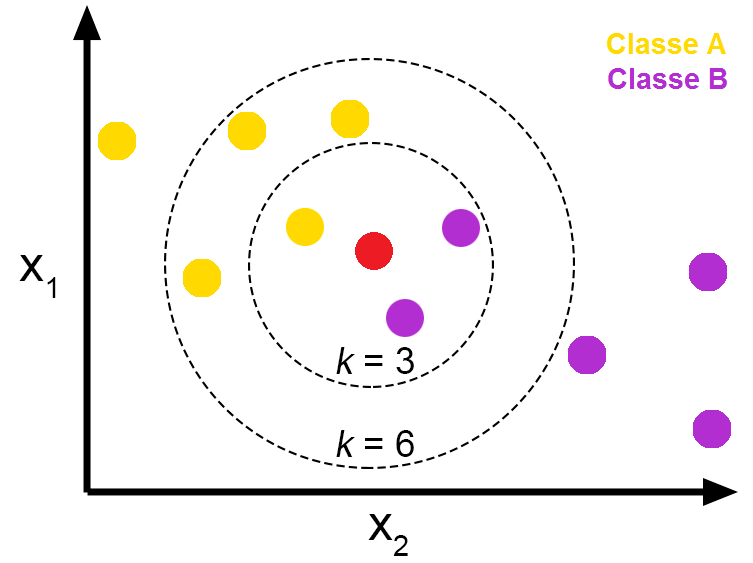

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print(accuracy_score(y_test,  knn.predict(X_test)))
plot_decision_regions(X_train.values, y_train, clf=knn)

The plot is more complex, because there the decision boundary is not a line

In [ ]:
params = {'n_neighbors' : [1, 3, 5, 10, 20, 25, 30, 50]}

clf = GridSearchCV(KNeighborsClassifier(),
                   params, cv=3,
                   scoring='accuracy'
                   )
clf.fit(X_train, y_train)

In [ ]:
print(accuracy_score(y_test,  clf.predict(X_test)))
plot_decision_regions(X_train.values, y_train, clf=clf)